In [1]:
! pip install snscrape

  Using cached snscrape-0.6.2.20230320-py3-none-any.whl (71 kB)


In [283]:
import numpy as np

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [355]:
pd.__version__

'1.5.3'

In [356]:
np.__version__

'1.23.5'

In [452]:
query_test = "web scraping "
for tweet in sntwitter.TwitterSearchScraper(query_test).get_items():
    items = vars(tweet)
    break

In [3]:
limit = 10000
ab_tweets = []

In [121]:
query = '(abortion OR miscarriage) until:2023-04-10 since:2022-10-27'
query2 = '(the) -abortion -miscarriage -music -movie lang:en until:2023-04-10 since:2022-10-27'

In [138]:
query3 = '(music OR movie) until:2023-04-10 since:2022-10-27'

In [18]:
def scrape_tweets(query, limit):
    tweets = []
    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.user.username, tweet.content,
                        tweet.retweetCount, tweet.likeCount, tweet.replyCount,
                        tweet.user.followersCount])

    df = pd.DataFrame(tweets, 
                      columns=['Date', 'User', 'Tweet', 'retweetCount', 
                               'likeCount', 'replyCount', 'followersCount'])
    return df

In [122]:
random = scrape_tweets(query2, 5000)

/var/folders/8q/bq8pw32x58s8y8_tnlr5dyvm0000gn/T/ipykernel_84020/4148361108.py:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content,


In [123]:
abortion = scrape_tweets(query, 5000)

/var/folders/8q/bq8pw32x58s8y8_tnlr5dyvm0000gn/T/ipykernel_84020/4148361108.py:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content,


In [139]:
music = scrape_tweets(query3, 5000)

/var/folders/8q/bq8pw32x58s8y8_tnlr5dyvm0000gn/T/ipykernel_84020/4148361108.py:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content,
Tweet 1644579323507265537 contains an app icon medium key '4_1648167430911303682' on app 'iphone_app'/'1533248097', but the corresponding medium is missing; dropping
Tweet 1644579323507265537 contains an app icon medium key '4_1648167430911303682' on app 'ipad_app'/'1533248097', but the corresponding medium is missing; dropping


In [63]:
random

,Date,User,Tweet,retweetCount,likeCount,replyCount,followersCount
0,2023-04-09 23:59:59+00:00,fireholdingfire,the hope of the whole world rests on the shoul...,0,2,0,2995
1,2023-04-09 23:59:59+00:00,NaviGoBoom,"@UberPoor Can use different chokes, more mass ...",1,15,1,31988
2,2023-04-09 23:59:59+00:00,Jeonna972,Also I feel a jk jb collab coming soon 👀,0,0,1,630
3,2023-04-09 23:59:59+00:00,SamanthaDelVec1,'I was assaulted': Incredulous Riley Gaines sl...,0,0,0,1991
4,2023-04-09 23:59:59+00:00,jimmy_guinn,"Wishing you all, your families, friends and lo...",0,0,0,758
...,...,...,...,...,...,...,...
995,2023-04-09 23:59:47+00:00,delavoid,You // Your fav Magic card https://t.co/FZF9A3...,0,1,0,55
996,2023-04-09 23:59:47+00:00,Christoe2451,@SportsCenter @JonRahmpga Masters isnt a PGA t...,0,4,2,88
997,2023-04-09 23:59:47+00:00,Ot_Silz,And a series set in the 15 years,0,0,0,2331
998,2023-04-09 23:59:47+00:00,Suicidal_bpd,this tweet is a rambling mess but im too lazy ...,0,0,0,3077


In [368]:
import vaderSentiment

In [370]:
vaderSentiment.__version__

AttributeError: module 'vaderSentiment' has no attribute '__version__'

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [65]:
analyzer = SentimentIntensityAnalyzer()

In [140]:
def calculate_intensity(df):
    results = []
    for tweet in df['Tweet']:
        vs = analyzer.polarity_scores(tweet)
        results.append(vs)
    
    df_results = pd.DataFrame(results)
    df_concat = pd.concat([df, df_results], axis=1)
    df_concat['engagement'] = df_concat['retweetCount'] + df_concat['likeCount'] + df_concat['replyCount']
    df_concat['absolute intensity'] = abs(df_concat['compound'])

    return df_concat

In [141]:
df_random  = calculate_intensity(random)

In [142]:
df_abortion =  calculate_intensity(abortion)

In [233]:
df_music = calculate_intensity(music)

In [510]:
df_random.to_csv('random.csv')
df_abortion.to_csv('abortion.csv')
df_music.to_csv('music.csv')

(array([ 218.,  340.,  432.,  351., 1310.,  226.,  459.,  585.,  613.,
         466.]),
 array([-0.9843 , -0.78592, -0.58754, -0.38916, -0.19078,  0.0076 ,
         0.20598,  0.40436,  0.60274,  0.80112,  0.9995 ]),
 <BarContainer object of 10 artists>)

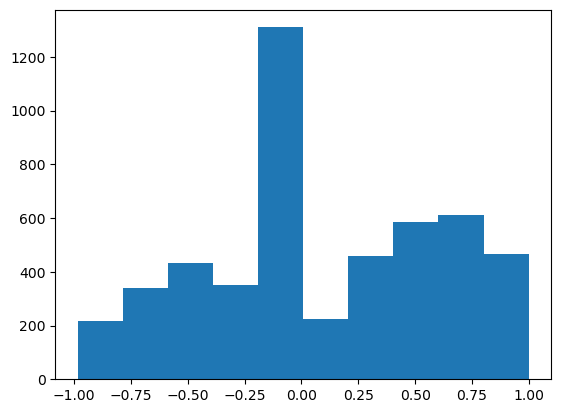

In [401]:
plt.hist(df_random['compound'])


(array([1268.,  240.,  378.,  428.,  543.,  529.,  454.,  497.,  419.,
         244.]),
 array([0.     , 0.09995, 0.1999 , 0.29985, 0.3998 , 0.49975, 0.5997 ,
        0.69965, 0.7996 , 0.89955, 0.9995 ]),
 <BarContainer object of 10 artists>)

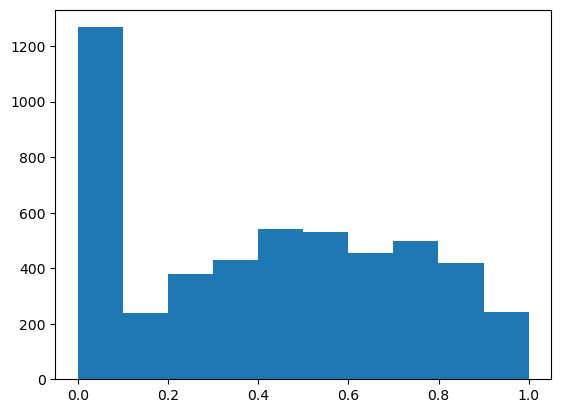

In [402]:
plt.hist(df_random['absolute intensity'])

In [404]:

pd.set_option('display.max_colwidth', None)

In [406]:
df_abortion['Tweet'][:20]

0                                                                                                                                                                                                   @PLLibertarian @warinutah @BrainyFlatus @JoJoFromJerz Of course. Unborn are not human life. If abortion were murder we’d be in jail
1                                                                                                                                                                                                                                                             @LifeNewsHQ There is much pain with an abortion. For the baby and mother.
2                                            Hearing a lot about how abortion bans affect "women" so to nip that in the bud here's a helpful list of the specific women you shouldn't care about for totally progressive reasons:\n\nWhite women (duh)\nRich women (always safe)\nCis women (idk seems TERFy)\nOld women (sex-negative)
3               

In [399]:
df_abortion.iloc[1]

Date                                          2023-04-09 23:59:52+00:00
User                                                      SweetLila5433
Tweet                 @LifeNewsHQ There is much pain with an abortio...
retweetCount                                                          0
likeCount                                                             0
replyCount                                                            0
followersCount                                                       12
neg                                                               0.216
neu                                                               0.784
pos                                                                 0.0
compound                                                        -0.5106
engagement                                                            0
absolute intensity                                               0.5106
Name: 1, dtype: object

AttributeError: PathCollection.set() got an unexpected keyword argument 'ylim'

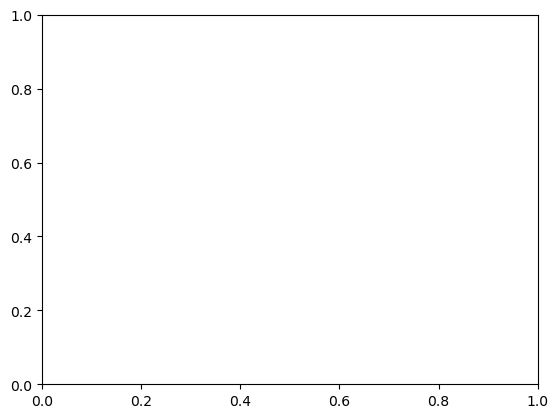

In [154]:
plt.scatter(df_random['absolute intensity'], df_random['engagement'], ylim=4000)
plt.Annotation

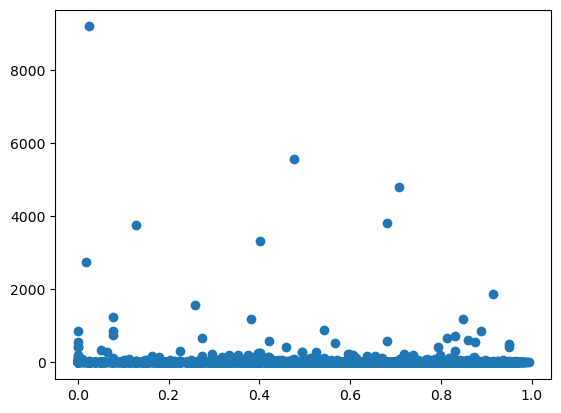

In [152]:
plt.scatter(df_abortion['absolute intensity'], df_abortion['engagement'])

(array([626.,  12.,  11.,   2.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([  1. ,  23.8,  46.6,  69.4,  92.2, 115. , 137.8, 160.6, 183.4,
        206.2, 229. ]),
 <BarContainer object of 10 artists>)

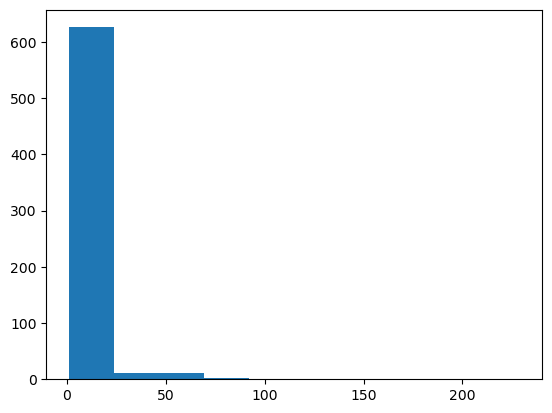

In [75]:
plt.hist(df_random[df_random['engagement'] > 0]['engagement'])

In [150]:
df_random.describe()

,retweetCount,likeCount,replyCount,followersCount,neg,neu,pos,compound,engagement,absolute intensity
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.108600,9.184200,0.602400,1.558773e+04,0.081899,0.793736,0.124366,0.109630,10.895200,0.415722
std,27.610362,162.176735,1.818839,6.443302e+05,0.113855,0.160644,0.140242,0.507083,189.497616,0.310314
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.984300,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.400000e+01,0.000000,0.690000,0.000000,-0.250000,0.000000,0.077200
50%,0.000000,1.000000,0.000000,2.895000e+02,0.000000,0.800000,0.092000,0.000000,1.000000,0.431650
75%,0.000000,2.000000,1.000000,1.052250e+03,0.140000,0.923250,0.201000,0.554100,3.000000,0.680800
max,1796.000000,10170.000000,72.000000,4.293581e+07,0.796000,1.000000,1.000000,0.999500,11976.000000,0.999500


In [151]:
df_abortion.describe()

,retweetCount,likeCount,replyCount,followersCount,neg,neu,pos,compound,engagement,absolute intensity
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.292000,12.194800,1.593200,4.107909e+04,0.112831,0.795790,0.091369,-0.090100,16.080000,0.445113
std,30.578622,164.641695,22.147456,9.022958e+05,0.114841,0.136615,0.100577,0.528496,202.584458,0.298767
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.206000,0.000000,-0.990300,0.000000,0.000000
25%,0.000000,0.000000,0.000000,5.500000e+01,0.000000,0.709000,0.000000,-0.557400,0.000000,0.196375
50%,0.000000,0.000000,0.000000,2.835000e+02,0.094000,0.801000,0.071000,0.000000,1.000000,0.448150
75%,0.000000,2.000000,1.000000,1.458000e+03,0.179000,0.892000,0.146250,0.361200,3.000000,0.700300
max,1098.000000,8461.000000,1076.000000,5.509302e+07,0.794000,1.000000,0.719000,0.993400,9187.000000,0.993400


In [234]:
df_music.describe()

,retweetCount,likeCount,replyCount,followersCount,neg,neu,pos,compound,engagement,absolute intensity
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.260000,14.666000,0.869800,4.036894e+03,0.060676,0.802386,0.136932,0.180919,17.795800,0.380111
std,53.252504,265.765367,7.885283,4.717241e+04,0.109954,0.180957,0.162301,0.468766,316.464305,0.328582
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.987800,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.020000e+02,0.000000,0.679000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,3.780000e+02,0.000000,0.816000,0.091000,0.000000,1.000000,0.381800
75%,0.000000,2.000000,1.000000,1.187250e+03,0.092000,1.000000,0.229000,0.599400,3.000000,0.665625
max,2996.000000,12299.000000,405.000000,2.820928e+06,1.000000,1.000000,0.833000,0.997200,15439.000000,0.997200


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc82a8e500>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc82a8ea40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc82a8e260>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc82a8ef80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc82a8f220>],
 'means': []}

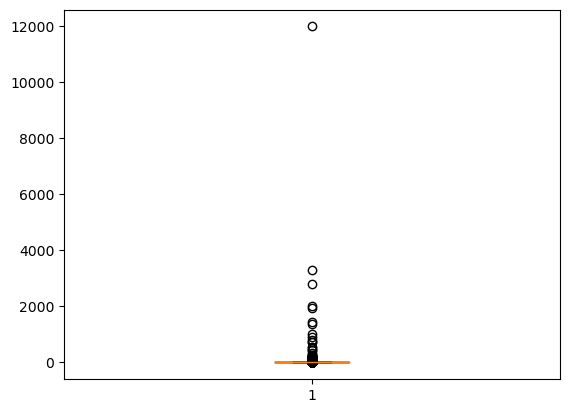

In [155]:
plt.boxplot(df_random['engagement'])

In [247]:
df_random_select  = df_random[df_random['engagement'] < 4000]
df_random_select  = df_random_select[df_random_select['engagement'] > 0]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc84f6a680>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc84f6abc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc84f6a3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc84f6b100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc84f6b3a0>],
 'means': []}

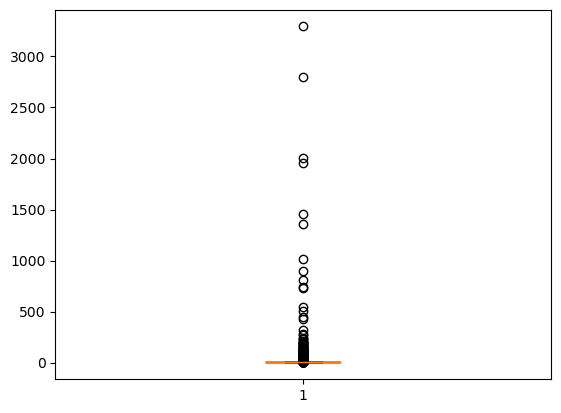

In [248]:
plt.boxplot(df_random_select['engagement'])

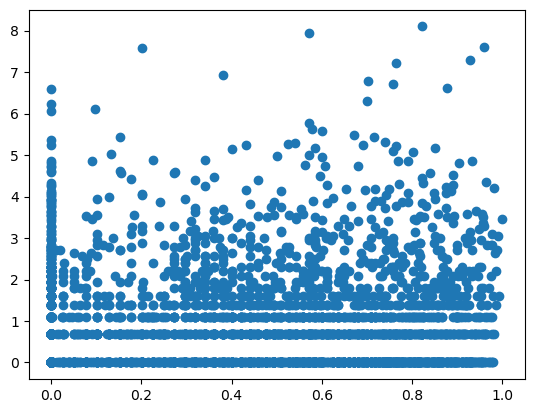

In [301]:
plt.scatter(df_random_select['absolute intensity'], np.log(df_random_select['engagement']))

In [415]:
df_random_follower = df_random_select[df_random_select['followersCount'] < 1.052250e+03]

In [416]:
df_random_follower.shape

(2264, 13)

(array([772., 399., 300., 204., 172., 111.,  92.,  86.,  76.,  52.]),
 array([   0. ,  105.2,  210.4,  315.6,  420.8,  526. ,  631.2,  736.4,
         841.6,  946.8, 1052. ]),
 <BarContainer object of 10 artists>)

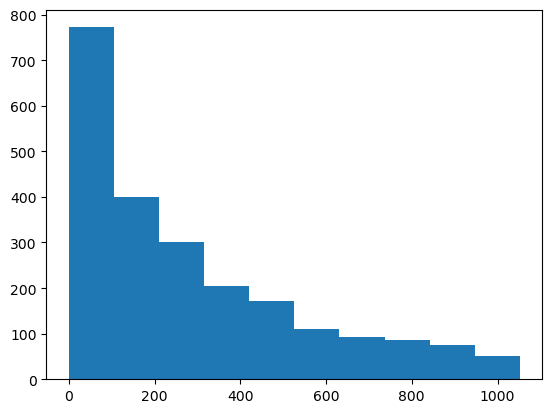

In [417]:
plt.hist(df_random_follower['followersCount'])

In [419]:
df_random.columns

Index(['Date', 'User', 'Tweet', 'retweetCount', 'likeCount', 'replyCount',
       'followersCount', 'neg', 'neu', 'pos', 'compound', 'engagement',
       'absolute intensity'],
      dtype='object')

In [422]:
df_random_eda = df_random[['retweetCount', 'likeCount', 'replyCount',
       'followersCount', 'neg', 'neu', 'pos', 'compound', 'engagement',
       'absolute intensity']]

In [488]:
df_random['engage_cat'] = df_random['engagement'].apply(lambda x: 1 if x > 0 else 0)
# df_random

In [494]:
summary = df_random[df_random['engagement']>3].describe()
summary

,retweetCount,likeCount,replyCount,followersCount,neg,neu,pos,compound,engagement,absolute intensity,engage_cat
count,986.000000,986.000000,986.000000,9.860000e+02,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.0
mean,5.529412,44.255578,1.753550,7.215591e+04,0.077028,0.801767,0.121205,0.123033,51.538540,0.438998,1.0
std,62.003780,363.244127,3.740451,1.449882e+06,0.107168,0.151187,0.134573,0.529294,424.477264,0.319984,0.0
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.980600,4.000000,0.000000,1.0
25%,0.000000,4.000000,0.000000,2.350000e+02,0.000000,0.702000,0.000000,-0.296000,5.000000,0.102700,1.0
50%,0.000000,7.000000,1.000000,8.445000e+02,0.000000,0.805000,0.093500,0.000000,8.000000,0.443500,1.0
75%,1.000000,15.000000,2.000000,3.166000e+03,0.132000,0.924750,0.198000,0.595900,19.000000,0.718400,1.0
max,1796.000000,10170.000000,72.000000,4.293581e+07,0.712000,1.000000,1.000000,0.999500,11976.000000,0.999500,1.0


In [502]:
bins = [0.0, 1.0, 3.0, 8.0, 19.0, float('inf')]
df_random['engage_order'] = pd.cut(df_random['engagement'], bins=bins, labels=[0, 1, 2, 3, 4], right = False)


In [503]:
df_random

,Date,User,Tweet,retweetCount,likeCount,replyCount,followersCount,neg,neu,pos,compound,engagement,absolute intensity,engage_cat,engage_order
0,2023-04-09 23:59:59+00:00,fireholdingfire,the hope of the whole world rests on the shoulders of a homeless man \n https://t.co/swZgNBCbKy,0,2,0,2994,0.000,0.828,0.172,0.4404,2,0.4404,1,1
1,2023-04-09 23:59:59+00:00,NaviGoBoom,"@UberPoor Can use different chokes, more mass in the front makes for a smoother swing (this is mostly fudd cope), reliability could be a factor but only if you don't use an Auto 5.",1,15,1,31994,0.057,0.943,0.000,-0.2500,17,0.2500,1,3
2,2023-04-09 23:59:59+00:00,DaYellowMelo,"I’m just saying… you can’t tell another grown man “shut the fuck up, bitch” (especially in the presence of 10K+ people) and feel he was in wrong cause he responded physically. Y’all are humans before y’all are basketball players, respect should still be there https://t.co/5esmZ3w9pQ",0,0,0,240,0.128,0.812,0.060,-0.5423,0,0.5423,0,0
3,2023-04-09 23:59:59+00:00,SteveGleason,"In 2014, I gave up breathing for lent... \n\nI'm grateful for resurrecting technology like the ventilator that has allowed me to have glorious moments like this with our family. It ain't easy, but it's awesome. \n\nLive the adventure.\n\nThanks Kyle! https://t.co/WgvkgwEm6i",48,1929,27,202594,0.031,0.594,0.375,0.9592,2004,0.9592,1,4
4,2023-04-09 23:59:59+00:00,fadeawaytreytak,"@NoHoShank Mavs fans spent the past year posting Game 7 memes like they won the ring last season, they brought this upon themselves. 😂",0,26,0,240,0.053,0.669,0.279,0.8442,26,0.8442,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023-04-09 23:59:14+00:00,angrybishop10,@richeisen I don't get it. I thought OBJ wanted to go to a team w a chance to win the SB? Why wouldn't he wait to see where everyone landed?,0,0,0,36,0.000,0.820,0.180,0.7319,0,0.7319,0,0
4996,2023-04-09 23:59:14+00:00,anyothertown,@Angry_Staffer That’s the humblest Trump I’ve ever seen. He must be wasted on Trump champagne,0,0,0,31,0.174,0.707,0.120,-0.2500,0,0.2500,0,0
4997,2023-04-09 23:59:14+00:00,TommyPhilips2,@djsmooth_15 @davidaldridgedc @TheAthletic Exactly! The optics may not have been good but the Mavs did the right thing by tanking toward the very end. Not in the beginning or in the middle of the season like 25% of the teams did this season.,0,0,1,9,0.037,0.887,0.077,0.4289,1,0.4289,1,1
4998,2023-04-09 23:59:14+00:00,XIUMlNATION,the way they're everything and more not a single person doing the wrong thing the stage presence the vocals the performance the theatrics of it all... and they KNOW they're it,0,0,0,279,0.094,0.906,0.000,-0.4767,0,0.4767,0,0


In [508]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [509]:

model = OrderedModel(df_random['engage_order'], df_random[['absolute intensity', 'followersCount']], distr='logit')
result = model.fit(method='bfgs', disp=False)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           engage_order   Log-Likelihood:                -6627.6
Model:                   OrderedModel   AIC:                         1.327e+04
Method:            Maximum Likelihood   BIC:                         1.331e+04
Date:                Tue, 18 Apr 2023                                         
Time:                        16:48:17                                         
No. Observations:                5000                                         
Df Residuals:                    4994                                         
Df Model:                           6                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
absolute intensity     0.2604      0.084      3.099      0.002       0.096       0.425
followersCount      1.937e-05   1.62e-06     11.921      0.000    1.62e-05    2.26e-05
0/1                   -0.4928      0.046    -10.827      0.000      -0.582      -0.404
1/2                    0.5176      0.020     26.138      0.000       0.479       0.556
2/3                    0.1229      0.034      3.581      0.000       0.056       0.190
3/4                   -0.1865      0.060     -3.116      0.002      -0.304      -0.069
======================================================================================
"""

In [ ]:
bins = [0, 1, 3]

(array([4.678e+03, 1.460e+02, 5.500e+01, 3.000e+01, 2.000e+01, 9.000e+00,
        9.000e+00, 4.000e+00, 8.000e+00, 4.000e+00]),
 array([  0. ,  14.6,  29.2,  43.8,  58.4,  73. ,  87.6, 102.2, 116.8,
        131.4, 146. ]),
 <BarContainer object of 10 artists>)

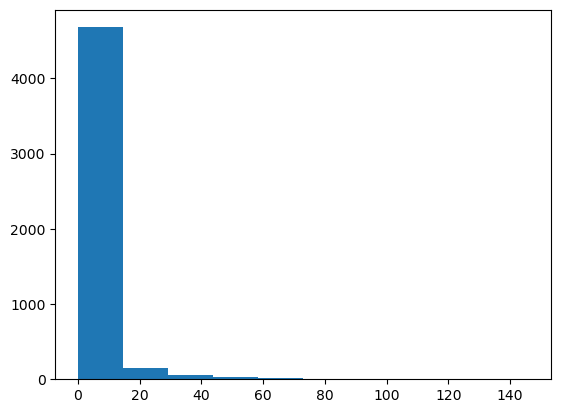

In [430]:
plt.hist(df_random[df_random['engagement'] < 150]['engagement'])

Text(0, 0.5, 'count of tweets')

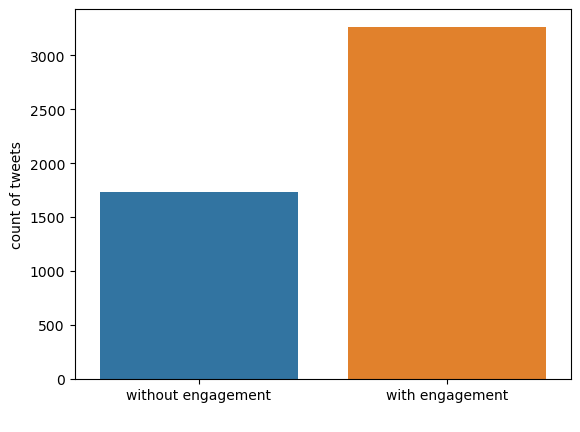

In [465]:
ax = sns.countplot(x=df_random['engage_cat'])
ax.set_xticklabels(['without engagement', 'with engagement'])
plt.xlabel(" ")
plt.ylabel("count of tweets")

Text(0, 0.5, 'count of tweets')

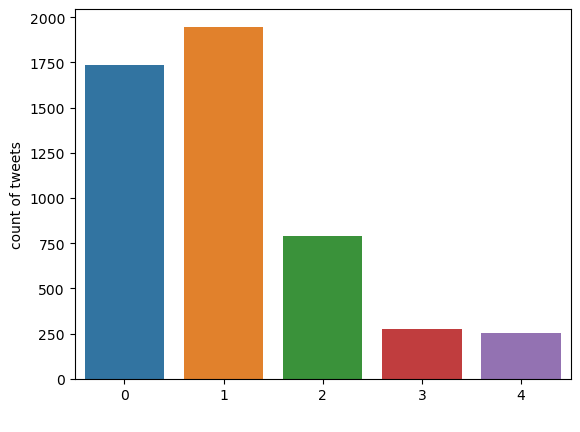

In [504]:
sns.countplot(x=df_random['engage_order'])
plt.xlabel(" ")
plt.ylabel("count of tweets")

In [466]:
df_random[df_random['engagement'] > 11000]

,Date,User,Tweet,retweetCount,likeCount,replyCount,followersCount,neg,neu,pos,compound,engagement,absolute intensity,engage_cat
2870,2023-04-09 23:59:34+00:00,aintnocrime,whenever i see this video i think of the tweet that said this was a regular friday night for wayv but for dream it was like their first time in a gay bar,1796,10170,10,199,0.0,0.844,0.156,0.6956,11976,0.6956,1


In [424]:
# sns.pairplot(df_random_eda)

In [446]:
df_random.describe()

,retweetCount,likeCount,replyCount,followersCount,neg,neu,pos,compound,engagement,absolute intensity,engage_cat
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.108600,9.184200,0.602400,1.558773e+04,0.081899,0.793736,0.124366,0.109630,10.895200,0.415722,0.653200
std,27.610362,162.176735,1.818839,6.443302e+05,0.113855,0.160644,0.140242,0.507083,189.497616,0.310314,0.475999
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.984300,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.400000e+01,0.000000,0.690000,0.000000,-0.250000,0.000000,0.077200,0.000000
50%,0.000000,1.000000,0.000000,2.895000e+02,0.000000,0.800000,0.092000,0.000000,1.000000,0.431650,1.000000
75%,0.000000,2.000000,1.000000,1.052250e+03,0.140000,0.923250,0.201000,0.554100,3.000000,0.680800,1.000000
max,1796.000000,10170.000000,72.000000,4.293581e+07,0.796000,1.000000,1.000000,0.999500,11976.000000,0.999500,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc6ef82ce0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc6ef83220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc6ef82a40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc6ef83760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc6ef83a00>],
 'means': []}

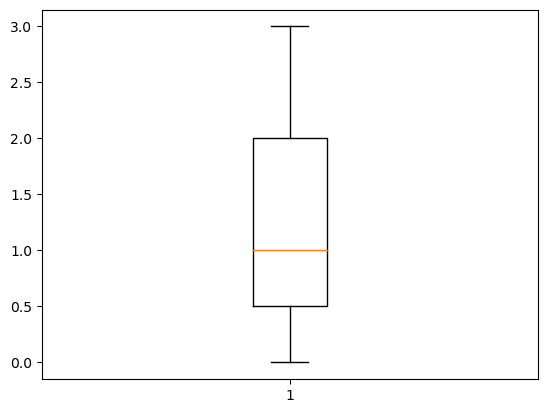

In [411]:
plt.boxplot(df_random_follower['followersCount'])

In [250]:
import statsmodels.formula.api as smf

In [442]:
import statsmodels.api as sm

In [432]:
x = df_random['absolute intensity']
# y = np.log(df_random_select['engagement'])
y = df_random['engage_cat']
confounder = df_random['followersCount']

In [433]:
data = pd.DataFrame({'x': x, 'confounder': confounder, 'y': y})


In [434]:
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data), columns=data.columns)


In [435]:
model = smf.ols('y ~ x + confounder', data=data_scaled).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.162
Date:                Tue, 18 Apr 2023   Prob (F-statistic):             0.0424
Time:                        13:51:25   Log-Likelihood:                -7091.5
No. Observations:                5000   AIC:                         1.419e+04
Df Residuals:                    4997   BIC:                         1.421e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.041e-17      0.014  -7.36e-16      1.0

,x,confounder,y
0,0.079534,-0.019547,0.728646
1,-0.534099,0.025465,0.728646
2,0.407944,-0.023822,-1.372409
3,1.751557,0.290263,0.728646
4,1.380927,-0.023822,0.728646
...,...,...,...
4995,1.018999,-0.024139,-1.372409
4996,-0.534099,-0.024146,-1.372409
4997,0.042471,-0.024181,0.728646
4998,0.196524,-0.023762,-1.372409


In [474]:
X = df_random[['absolute intensity', 'followersCount']]
y = df_random[['engagement']]

In [480]:
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [485]:
scaler.fit(y)
y_scaled = pd.DataFrame(scaler.transform(y), columns=y.columns)

In [487]:
model = sm.ZeroInflatedPoisson(y_scaled, X_scaled).fit()

# Print the summary of the model
print(model.summary())

/Users/axyz1220/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/axyz1220/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1103: RuntimeWarning: invalid value encountered in log
  params = [np.log(const)]
/Users/axyz1220/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/axyz1220/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 1.091169
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:              engagement   No. Observations:                 5000
Model:             ZeroInflatedPoisson   Df Residuals:                     4998
Method:                            MLE   Df Model:                            1
Date:                 Tue, 18 Apr 2023   Pseudo R-squ.:                     nan
Time:                         16:30:03   Log-Likelihood:                -5455.8
converged:                        True   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const 

/Users/axyz1220/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/axyz1220/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [440]:
# plt.hist(df_random[df_random['engage_cat'] == 1]['absolute intensity'])

In [444]:
model = sm.OLS(df_random['engage_cat'], df_random[['absolute intensity', 'followersCount']]).fit(method='qr')

# view the model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:             engage_cat   R-squared (uncentered):                   0.434
Model:                            OLS   Adj. R-squared (uncentered):              0.434
Method:                 Least Squares   F-statistic:                              1920.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:07:30   Log-Likelihood:                         -4605.2
No. Observations:                5000   AIC:                                      9214.
Df Residuals:                    4998   BIC:                                      9227.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc84552950>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc84552d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc845526b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc845532b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc84553550>],
 'means': []}

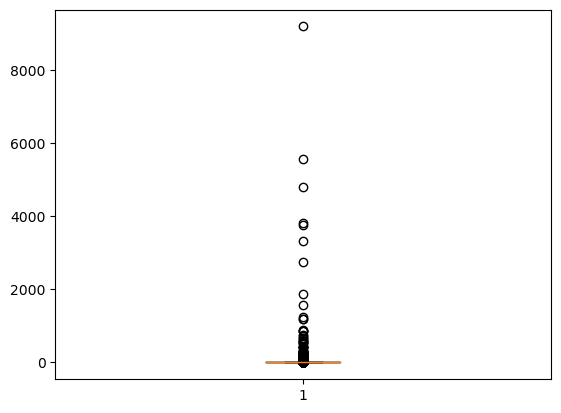

In [204]:
plt.boxplot(df_abortion['engagement'])

In [375]:
df_abortion_select = df_abortion[df_abortion['engagement'] < 4000]
df_abortion_select = df_abortion_select[df_abortion_select['engagement'] > 0]
# df_abortion_select = df_abortion[df_abortion['engagement'] > 0]

In [319]:
df_abortion_neg = df_abortion_select[df_abortion_select['compound']<-0.05]

In [323]:
df_abortion_pos = df_abortion_select[df_abortion_select['compound']>0.05]

In [350]:
data2 = pd.DataFrame({'x': df_abortion_select['neu'], 'confounder': 
df_abortion_select['followersCount'], 
'y': np.log(df_abortion_select['engagement'])})


In [335]:
data2_neg = pd.DataFrame({'x': df_abortion_neg['absolute intensity'], 'confounder': 
df_abortion_neg['followersCount'], 
'y': np.log(df_abortion_neg['engagement'])})


In [351]:
model = smf.ols('y ~ x + confounder', data=data2).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     30.16
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.09e-13
Time:                        10:32:50   Log-Likelihood:                -5001.0
No. Observations:                2887   AIC:                         1.001e+04
Df Residuals:                    2884   BIC:                         1.003e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4208      0.156      9.114      0.0

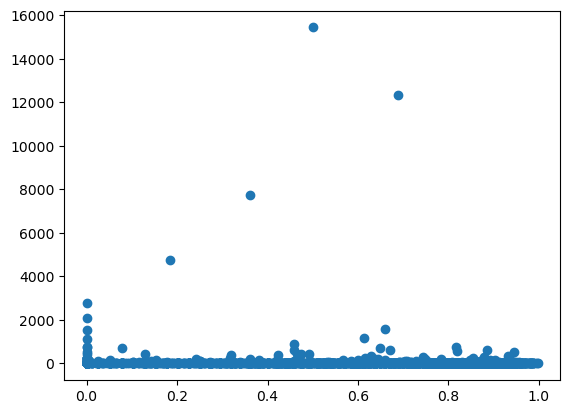

In [378]:
plt.scatter(df_music_select['absolute intensity'],df_music_select['engagement'])

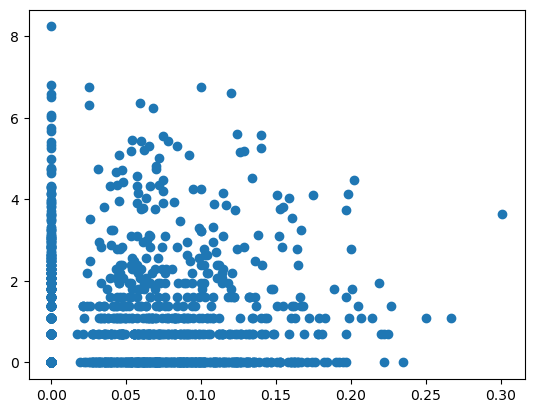

In [347]:
plt.scatter(df_abortion_neg['pos'], np.log(df_abortion_neg['engagement']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc84d02c80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc84d031c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc84d029e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc84d03700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc84d039a0>],
 'means': []}

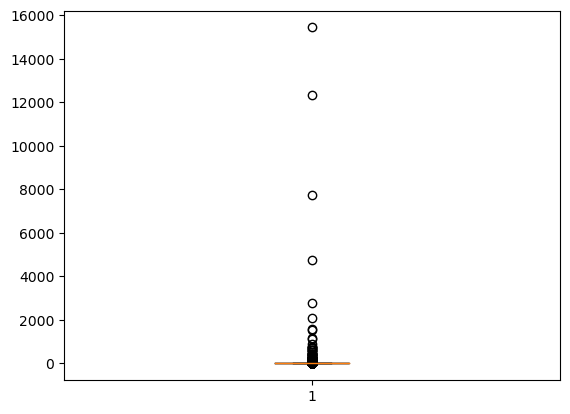

In [235]:
plt.boxplot(df_music['engagement'])

In [389]:
df_music_select = df_music[df_music['engagement']<1600]
df_music_select = df_music_select[df_music_select['engagement']>1]
# df_music_select = df_music[df_music['engagement']>0]

In [273]:
df_music_positive = df_music_select[df_music_select['compound']>0.05]

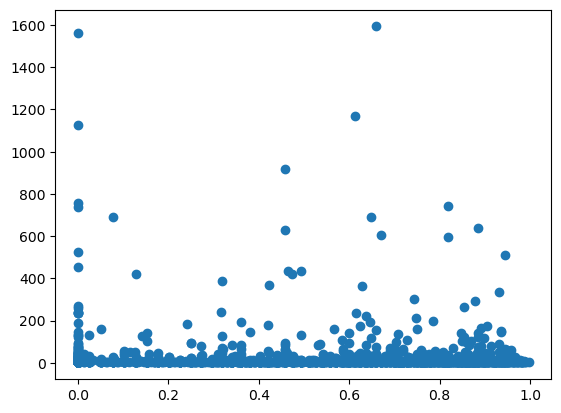

In [391]:
plt.scatter(df_music_select['absolute intensity'], df_music_select['engagement'])

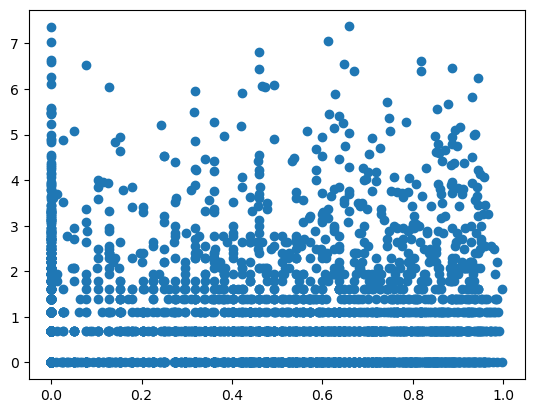

In [380]:
plt.scatter(df_music_select['absolute intensity'], np.log(df_music_select['engagement']))

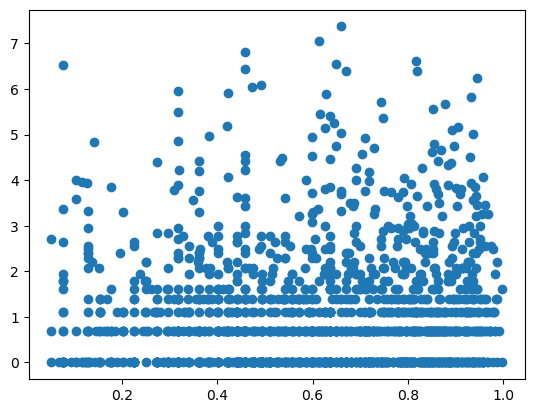

In [284]:
plt.scatter(df_music_positive['absolute intensity'], np.log(df_music_positive['engagement']))

In [298]:
data3 = pd.DataFrame({'x': df_music_select['absolute intensity'], 
'confounder': df_music_select['followersCount'], 
'y': np.log(df_music_select['engagement'])})


In [358]:
sklearn.preprocessing.__version__

NameError: name 'sklearn' is not defined

In [299]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the dataframe
scaler.fit(data3)

# Scale the dataframe
data3_scaled = pd.DataFrame(scaler.transform(data3), columns=data3.columns)


In [392]:
model = smf.ols('y ~ x + confounder', data=data3_scaled).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     31.61
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.55e-14
Time:                        12:34:03   Log-Likelihood:                -4482.3
No. Observations:                3181   AIC:                             8971.
Df Residuals:                    3178   BIC:                             8989.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.034e-16      0.018  -5.89e-15      1.0

In [360]:
import matplotlib

In [361]:
matplotlib.__version__

'3.7.0'

In [364]:
import sklearn

In [365]:
sklearn.__version__

'1.2.1'

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_cont = df_abortion[['retweetCount', 'likeCount', 'replyCount','followersCount']]

In [19]:
df_corr = df_cont.corr()

<Axes: >

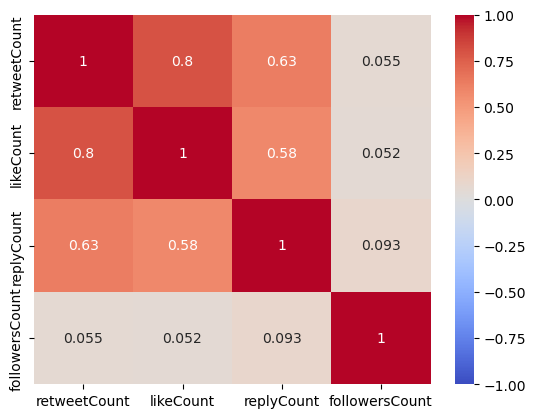

In [20]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

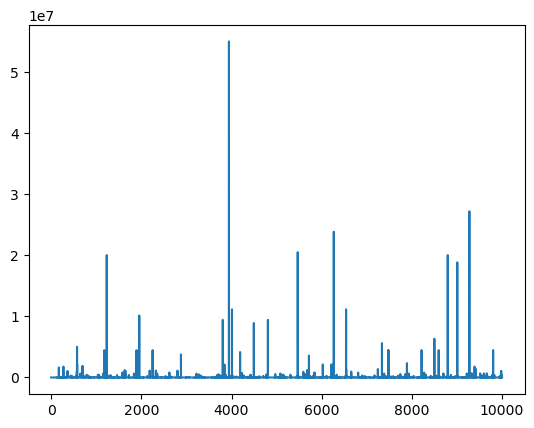

In [15]:
plt.plot(df_abortion['followersCount'])

In [54]:
import regex as re
import contractions

In [65]:
def clean_tweet(df):
# make all text lowercase
    tweet = df['Tweet'].str.lower()
    clean_text = []

    # clean text
    for t in tweet:
        # remove \n
        clean_t = re.sub(r"\n", " ", t)
        # remove @account
        clean_t = re.sub(r"@[^\s]+", "", clean_t)
        # remove hashtag
        clean_t = re.sub(r"#", "", clean_t)
        # remove urls
        clean_t = re.sub(r"(www[^\s]+) | (http[^\s]+)", "", clean_t)
        # remove &amp
        clean_t = re.sub(r"&amp", "", clean_t)
        # fix contractions
        clean_t = contractions.fix(clean_t)
        # remove punctuations
        clean_t = re.sub("[^a-z0-9]", " ", clean_t)
        # remove numbers
        clean_t = re.sub(r"\d+", "", clean_t)
    
        clean_text.append(clean_t)
    
    df['clean_tweet'] = clean_text

In [66]:
clean_tweet(df_abortion)

In [75]:
df_abortion['Tweet'][5]

'@catturd2 @Steph93065In21 @gatewaypundit Presler did great job, but Kelly was a weak candidate who said he didn’t want Trump’s endorsement, and abortion issue is problematic. Other races did well. Senate now can impeach with super majority. Cheap shot.'